In [3]:
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
np.random.seed(3)

## 1. Generate data set.

# get train set and test set from keras.(numpy ndarray data type.)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #여기서 테스트와 트레인 데이터 셋을 각각 가져옴(튜플로 되어있음))


# seperate train set and validation set.
X_val = X_train[50000:] # 10000개.
Y_val = Y_train[50000:] # 10000개 
X_train = X_train[:50000] # 50,000 개
Y_train = Y_train[:50000] # 50,000 개 

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0  #28*28 짜리 데이터를 쭉 펴는듯?
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32')/255.0

# make 700 numbers of value between 0~49999
train_rand_idxs = np.random.choice(50000, 700) # 0~49999까지의 렌덤 인덱스 700개를 뽑는다.
val_rand_idxs = np.random.choice(10000, 300) # 0~9999까지의 랜덤 인덱스 300개를 뽑는다.

X_train = X_train[train_rand_idxs] # 트레인 데이터 700개를 랜덤 추출.
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs] #검증 데이터 300개를 랜덤 인덱스로 추출.
Y_val = Y_val[val_rand_idxs]

# one-hot encoding.
Y_train = np_utils.to_categorical(Y_train) #Y데이터들을 categorical 하게 만든다.
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

In [7]:
early_stopping = EarlyStopping(patience=20)
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 1s 1ms/step - loss: 2.3058 - acc: 0.1057 - val_loss: 2.2850 - val_acc: 0.1467
Epoch 2/3000
700/700 [==============================] - 0s 269us/step - loss: 2.2808 - acc: 0.1471 - val_loss: 2.2391 - val_acc: 0.2000
Epoch 3/3000
700/700 [==============================] - 0s 268us/step - loss: 2.2445 - acc: 0.1757 - val_loss: 2.1905 - val_acc: 0.1967
Epoch 4/3000
700/700 [==============================] - 0s 271us/step - loss: 2.2149 - acc: 0.1614 - val_loss: 2.1340 - val_acc: 0.1767
Epoch 5/3000
700/700 [==============================] - 0s 271us/step - loss: 2.1496 - acc: 0.1643 - val_loss: 2.0654 - val_acc: 0.2233
Epoch 6/3000
700/700 [==============================] - 0s 276us/step - loss: 2.0917 - acc: 0.1914 - val_loss: 2.0087 - val_acc: 0.2333
Epoch 7/3000
700/700 [==============================] - 0s 290us/step - loss: 2.0472 - acc: 0.2057 - val_loss: 1.9648 - val_acc: 0.2533
Epoc

700/700 [==============================] - 0s 236us/step - loss: 1.2691 - acc: 0.5114 - val_loss: 1.4274 - val_acc: 0.4700
Epoch 61/3000
700/700 [==============================] - 0s 237us/step - loss: 1.2636 - acc: 0.5000 - val_loss: 1.4327 - val_acc: 0.4700
Epoch 62/3000
700/700 [==============================] - 0s 238us/step - loss: 1.2588 - acc: 0.4900 - val_loss: 1.4271 - val_acc: 0.4800
Epoch 63/3000
700/700 [==============================] - 0s 239us/step - loss: 1.2531 - acc: 0.4986 - val_loss: 1.4218 - val_acc: 0.4833
Epoch 64/3000
700/700 [==============================] - 0s 285us/step - loss: 1.2483 - acc: 0.4914 - val_loss: 1.4235 - val_acc: 0.4933
Epoch 65/3000
700/700 [==============================] - 0s 248us/step - loss: 1.2456 - acc: 0.4971 - val_loss: 1.4253 - val_acc: 0.4800
Epoch 66/3000
700/700 [==============================] - 0s 240us/step - loss: 1.2405 - acc: 0.4943 - val_loss: 1.4226 - val_acc: 0.4867
Epoch 67/3000
700/700 [==============================] 

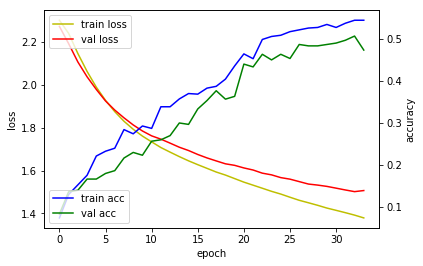

NameError: name 'x_test' is not defined

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch') #x축 이름 정하기
loss_ax.set_ylabel('loss') #y축 이름 정하기
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss : '+ str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))












